In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1) Read in the titanic data set into a pandas dataframe.

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/galvin-mj/DAT_ATL_15/master/Datasets/titanic_train.csv')

# 2) Look at the first 5 rows.

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


# 3) What is the size of the data set? (rows and columns).

In [5]:
rows = data.shape[0]
columns = len(data.columns)
print(rows,'X',columns)

891 X 12


# 4) How many people survived? What percentage of people survived?

In [6]:
survivors = sum(data['Survived'])
percent_survived = survivors/rows
print(survivors,'Passengers Survived')
print(percent_survived*100,'% of Passengers Survived')

342 Passengers Survived
38.3838383838 % of Passengers Survived


# 5) What percentage of passengers are male? female?

In [7]:
male_count = data[data['Sex'] == 'male'].shape[0]
female_count = data[data['Sex'] == 'female'].shape[0]
print(male_count/rows*100,'% are males and',female_count/rows*100,'% are females')

64.75869809203144 % are males and 35.24130190796858 % are females


# 6) What is the survival rate of male passengers? female passengers?

In [8]:
male_survival = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]/male_count
female_survival = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]/female_count
print(male_survival*100,'% of Males Survived and',female_survival*100,'% of Females Survived')

18.890814558058924 % of Males Survived and 74.20382165605095 % of Females Survived


# 7) How many different cabin classes, Pclass, are there?

In [9]:
class_count = len(data['Pclass'].unique())
print('There are',class_count,'Different Classes')

There are 3 Different Classes


# 8) What percent of the passengers are in each class?

In [10]:
first_class_percentage = data[data['Pclass'] == 1].shape[0]/rows
second_class_percentage = data[data['Pclass'] == 2].shape[0]/rows
third_class_percentage = data[data['Pclass'] == 3].shape[0]/rows
print(first_class_percentage*100,'% are in First Class,')
print(second_class_percentage*100,'% are in Second Class')
print(third_class_percentage*100,'% are in third class')

24.242424242424242 % are in First Class,
20.65095398428732 % are in Second Class
55.106621773288445 % are in third class


# 9) What is the survival rate within each class?

In [11]:
first_class_survival = data[(data['Pclass'] == 1) & (data['Survived'] == 1)].shape[0]/data[data['Pclass'] == 1].shape[0]
second_class_survival = data[(data['Pclass'] == 2) & (data['Survived'] == 1)].shape[0]/data[data['Pclass'] == 2].shape[0]
third_class_survival = data[(data['Pclass'] == 3) & (data['Survived'] == 1)].shape[0]/data[data['Pclass'] == 3].shape[0]
print(first_class_survival*100,'% of First Class Passengers Survived')
print(second_class_survival*100,'% of Second Class Passengers Survived')
print(third_class_survival*100,'% of Third Class Passengers Survived')

62.96296296296296 % of First Class Passengers Survived
47.28260869565217 % of Second Class Passengers Survived
24.236252545824847 % of Third Class Passengers Survived


# 10) Create a histogram of ages split by sex and survival.

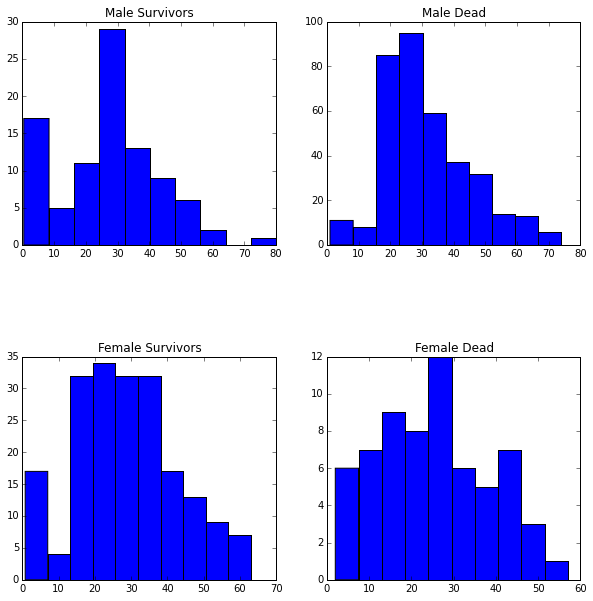

In [40]:
male_survivors = data[(data['Sex'] == 'male') & (data['Survived'] == 1)]
male_surv = male_survivors[np.isfinite(male_survivors['Age'])]

male_dead = data[(data['Sex'] == 'male') & (data['Survived'] == 0)]
male_died = male_dead[np.isfinite(male_dead['Age'])]

female_survivors = data[(data['Sex'] == 'female') & (data['Survived'] == 1)]
female_surv = female_survivors[np.isfinite(female_survivors['Age'])]

female_dead = data[(data['Sex'] == 'female') & (data['Survived'] == 0)]
female_died = female_dead[np.isfinite(female_dead['Age'])]

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.hist(male_surv['Age'].values)
plt.title('Male Survivors')

ax2 = fig.add_subplot(2,2,2)
ax2.hist(male_died['Age'].values)
plt.title('Male Dead')

ax3 = fig.add_subplot(2,2,3)
ax3.hist(female_surv['Age'].values)
plt.title('Female Survivors')

ax4 = fig.add_subplot(2,2,4)
ax4.hist(female_died['Age'].values)
plt.title('Female Dead')

fig.subplots_adjust(hspace = .5)
plt.show()

# 10) Create a boxplot for age split by class and sex.

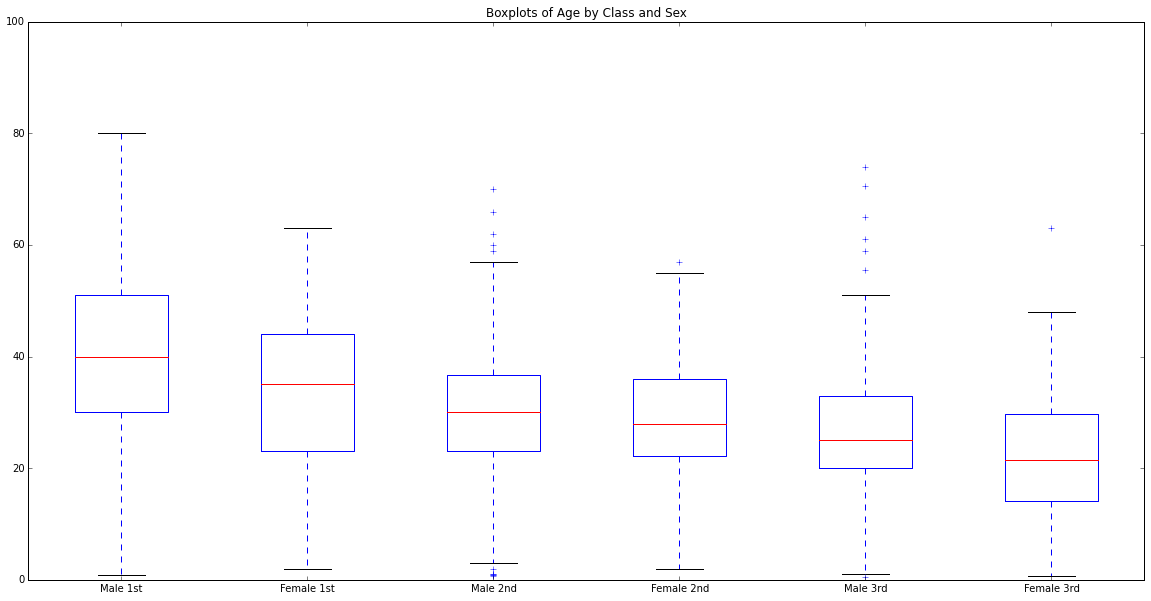

In [39]:
male_first = data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]
male_1st = male_first[np.isfinite(male_first['Age'])]

male_second = data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]
male_2nd = male_second[np.isfinite(male_second['Age'])]

male_third = data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]
male_3rd = male_third[np.isfinite(male_third['Age'])]

female_first = data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]
female_1st = female_first[np.isfinite(female_first['Age'])]

female_second = data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]
female_2nd = female_second[np.isfinite(female_second['Age'])]

female_third = data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]
female_3rd = female_third[np.isfinite(female_third['Age'])]

plot_info = [male_1st['Age'].values, female_1st['Age'].values, male_2nd['Age'].values, female_2nd['Age'].values, male_3rd['Age'].values, female_3rd['Age'].values]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,1,1)
ax1.boxplot(plot_info, labels=['Male 1st', 'Female 1st', 'Male 2nd', 'Female 2nd', 'Male 3rd', 'Female 3rd'])
ax1.set_ylim(0, 100)
ax1.set_title('Boxplots of Age by Class and Sex')
plt.show()

# 12) For each class create a histogram plot of ages split by suvivor or not.

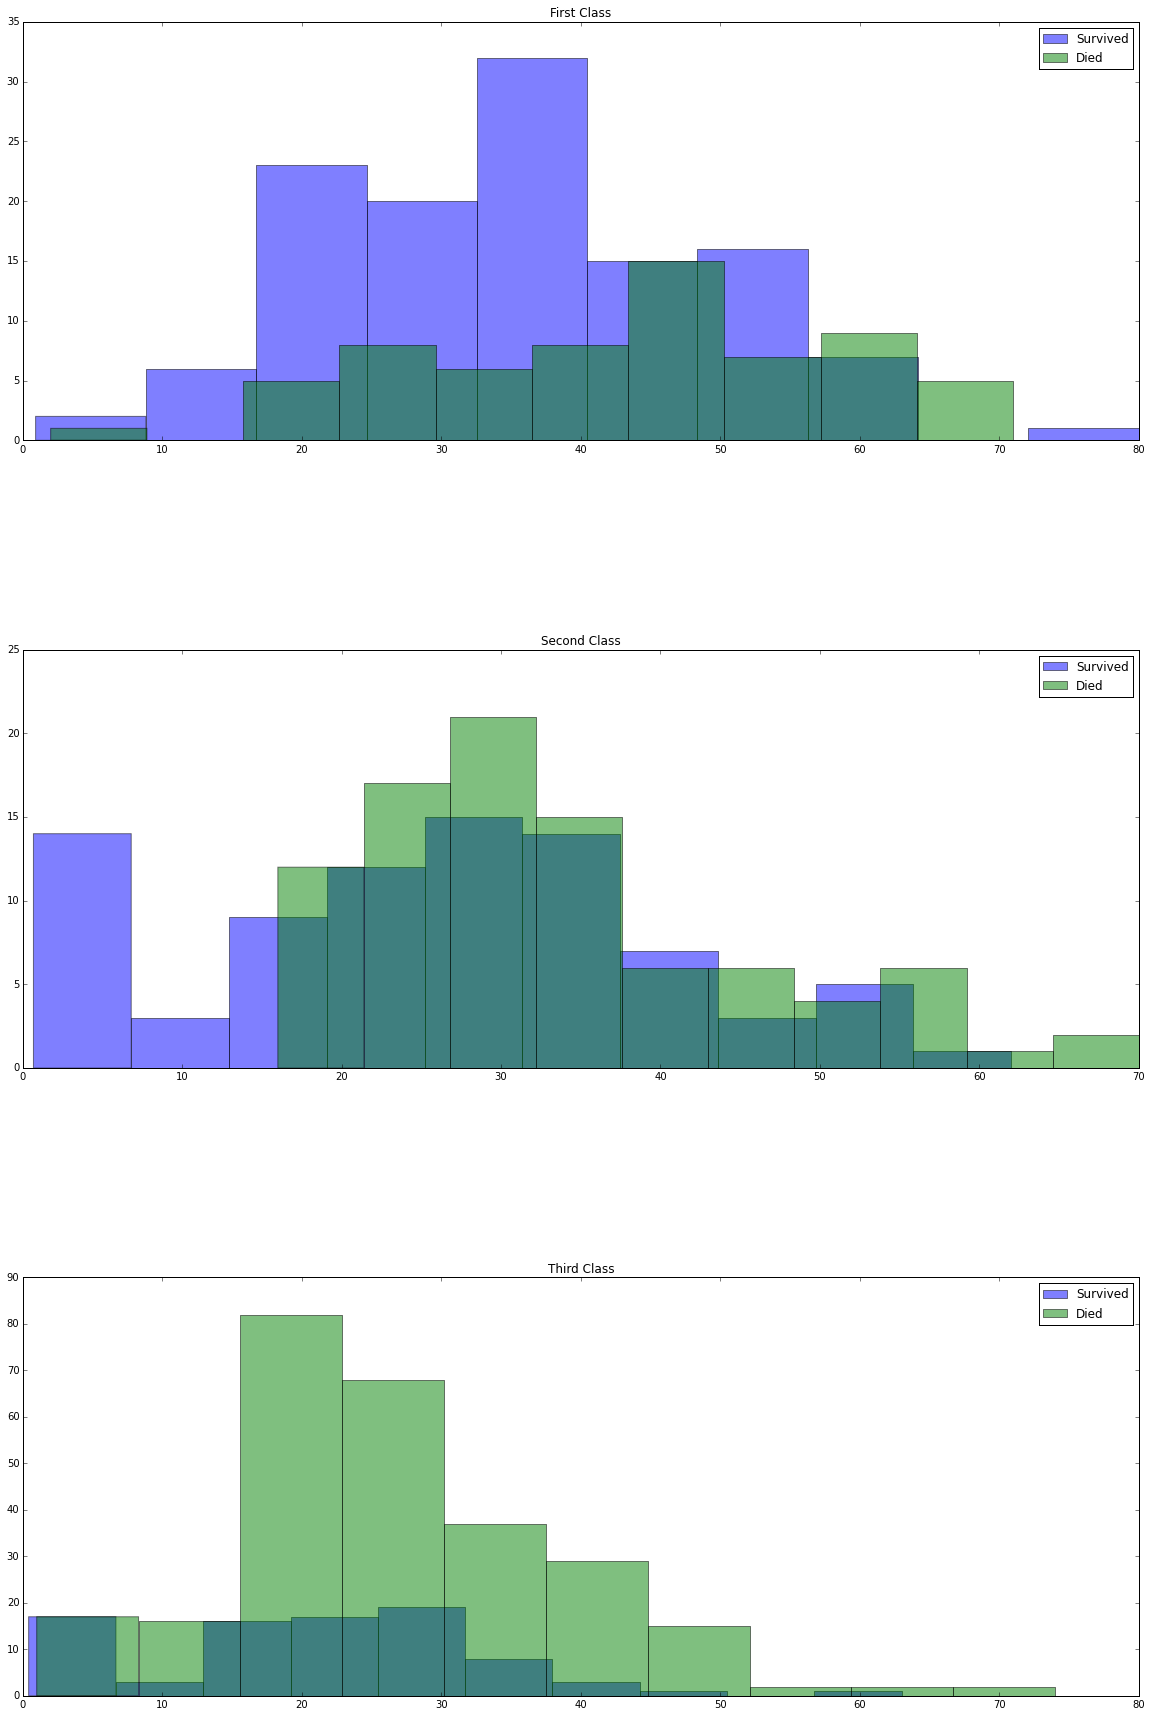

In [41]:
surv_first = data[(data['Survived'] == 1) & (data['Pclass'] == 1)]
surv_1st = surv_first[np.isfinite(surv_first['Age'])]

surv_second = data[(data['Survived'] == 1) & (data['Pclass'] == 2)]
surv_2nd = surv_second[np.isfinite(surv_second['Age'])]

surv_third = data[(data['Survived'] == 1) & (data['Pclass'] == 3)]
surv_3rd = surv_third[np.isfinite(surv_third['Age'])]

dead_first = data[(data['Survived'] == 0) & (data['Pclass'] == 1)]
dead_1st = dead_first[np.isfinite(dead_first['Age'])]

dead_second = data[(data['Survived'] == 0) & (data['Pclass'] == 2)]
dead_2nd = dead_second[np.isfinite(dead_second['Age'])]

dead_third = data[(data['Survived'] == 0) & (data['Pclass'] == 3)]
dead_3rd = dead_third[np.isfinite(dead_third['Age'])]

fig = plt.figure(figsize=(20,30))

ax1 = fig.add_subplot(3,1,1)
ax1.hist(surv_1st['Age'].values, alpha = 0.5,  label = 'Survived')
ax1.hist(dead_1st['Age'].values, alpha = 0.5,  label = 'Died')
ax1.legend(loc='upper right')
ax1.set_title('First Class')

ax2 = fig.add_subplot(3,1,2)
ax2.hist(surv_2nd['Age'].values, alpha = 0.5,  label = 'Survived')
ax2.hist(dead_2nd['Age'].values, alpha = 0.5,  label = 'Died')
ax2.legend(loc='upper right')
ax2.set_title('Second Class')

ax1 = fig.add_subplot(3,1,3)
ax1.hist(surv_3rd['Age'].values, alpha = 0.5,  label = 'Survived')
ax1.hist(dead_3rd['Age'].values, alpha = 0.5,  label = 'Died')
ax1.legend(loc='upper right')
ax1.set_title('Third Class')

fig.subplots_adjust(hspace = .5)
plt.show()

# 13) Discuss anything interesting you found. Where there any surprises? Are there any data issues you found? If you wanted to predict survival or not what do you think we be the most useful?

The difference in the survival rates between the classes and the genders was expected, but the starkness of it was surprising.

There were 'NaN' values for ages. These had to be filtered out to plot the histograms, which means the data is restricted. This could cause some problems with the analysis, such as more third class passengers not having a recorded age than first class.

Straight forward survival rates mask the trend in younger passengers and women having a much better chance of surviving. 

The best predictors of survival would be Sex, Pclass, and Age.